In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from datetime import datetime
import shap

In [33]:
exec(open("../../header.py").read())

# Import data

In [84]:
folder = 'boston'

In [85]:
X = pd.read_csv(processed_root(f'{folder}/X.csv'))
y = pd.read_csv(processed_root(f'{folder}/y.csv'))

In [86]:
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)

X = (X - mean)/std

# Fit linear regression model

In [37]:
lr = Ridge()
lr.fit(X, y.iloc[:,0])

Ridge()

In [38]:
lr.score(X, y)

0.7406304514762485

In [39]:
y = lr.predict(X)

# Fit random forest to linear regression model

In [64]:
X.shape

(506, 13)

In [78]:
train_samples = np.random.choice(X.index, size = int(0.7 * X.shape[0]))

In [79]:
X_train = X.loc[train_samples,:]
y_train = y[train_samples]
X_test = X.loc[~(X.index.isin(train_samples)),:]
y_test = y[~(X.index.isin(train_samples))]

In [80]:
tree_model = GradientBoostingRegressor()
tree_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [81]:
train_accuracy = tree_model.score(X_train, y_train)
test_accuracy = tree_model.score(X_test, y_test)
print(f"Train R^2: {train_accuracy}")
print(f"Test R^2: {test_accuracy}")

Train R^2: 0.9958162210176722
Test R^2: 0.9591180477596021


# On original linear model

In [50]:
shapley = SHAP_FI("linear")
ice = ICE("continuous")
native = Native_FI()
fi_metrics = [ice, shapley, native]
# fi_metrics = [ice, native]

In [51]:
comparator2 = Comparator()
comparator2.fit(X, lr, fi_metrics)

In [54]:
comparator2.build_raw_table().head(5)

,Feature,Feature Impact,In-Dist Feature Impact,Shapley Value,Native Feature Importance
0,CRIM,0.919871,0.919871,-0.012890,-0.919871
1,ZN,1.066461,1.066461,-0.049954,1.066461
2,INDUS,0.117385,0.117385,0.010511,0.117385
3,CHAS,0.685127,0.685127,0.024760,0.685127
4,NOX,2.029010,2.029010,-0.061434,-2.029010


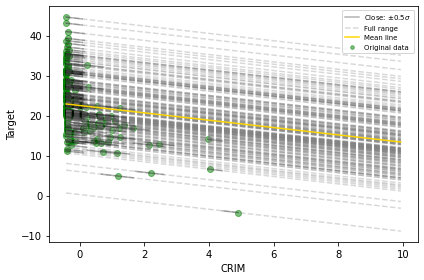

In [55]:
ice.ice_plot_single_feature('CRIM')

# Feature metrics vs original regression coefficients

In [42]:
shapley = SHAP_FI("tree")
ice = ICE("continuous")
native = Native_FI()
pfi = PFI_FI(y)
fi_metrics = [ice, shapley, native, pfi]
# fi_metrics = [ice, native]

In [43]:
comparator = Comparator()
comparator.fit(X, tree_model, fi_metrics)

PFI fits in 0.25 seconds


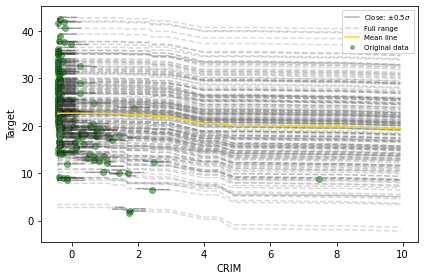

In [47]:
ice.ice_plot_single_feature('CRIM')

In [57]:
results = comparator.build_raw_table()
original_coef = pd.DataFrame({'Feature':X.columns,
                              'Original Coefficients':np.abs(lr.coef_)})

results = results.merge(original_coef, how = "left", on = "Feature")
results

,Feature,Feature Impact,In-Dist Feature Impact,Shapley Value,Native Feature Importance,PFI,Original Coefficients
0,CRIM,3.993602,4.217727,0.036820,0.008103,0.008087,0.919871
1,ZN,0.342885,0.362546,-0.013312,0.004094,0.008320,1.066461
2,INDUS,0.158592,0.141873,-0.002609,0.000629,0.000475,0.117385
3,CHAS,0.541544,0.541544,-0.009039,0.007775,0.010289,0.685127
4,NOX,0.265851,0.270811,0.022372,0.003453,0.005599,2.029010
5,RM,6.935400,7.178788,-0.289460,0.257822,0.270812,2.682754
6,AGE,0.016775,0.019815,-0.002278,0.000193,0.000182,0.013158
7,DIS,1.387582,1.353517,0.051738,0.021109,0.041801,3.077340
8,RAD,0.576682,0.572078,-0.002010,0.002059,0.003979,2.591538
9,TAX,1.492922,1.503699,-0.047961,0.008724,0.011897,2.010558


In [59]:
np.corrcoef(results['Feature Impact'], results['Original Coefficients'])[0,1]

0.5429100258847829

In [63]:
np.corrcoef(results['In-Dist Feature Impact'], results['Original Coefficients'])[0,1]

0.5273350138014816

In [60]:
np.corrcoef(results['Shapley Value'], results['Original Coefficients'])[0,1]

0.19204849666477086

In [62]:
np.corrcoef(results['Native Feature Importance'], results['Original Coefficients'])[0,1]

0.6343243584093212

# On original linear model

In [88]:
shapley = SHAP_FI("tree")
ice = ICE("continuous")
native = Native_FI()
fi_metrics = [ice, shapley, native]
# fi_metrics = [ice, native]

In [89]:
model = GradientBoostingRegressor()
model.fit(X, y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GradientBoostingRegressor()

In [90]:
comparator2 = Comparator()
comparator2.fit(X, model, fi_metrics)

In [91]:
comparator2.build_raw_table().head(5)

,Feature,Feature Impact,In-Dist Feature Impact,Shapley Value,Native Feature Importance
0,CRIM,65.602808,67.346686,0.042185,0.026326
1,ZN,0.080982,0.056827,0.001719,0.000258
2,INDUS,0.991983,0.936340,0.014065,0.002350
3,CHAS,0.129855,0.129855,-0.002205,0.000873
4,NOX,1.025594,1.029971,0.078299,0.036465


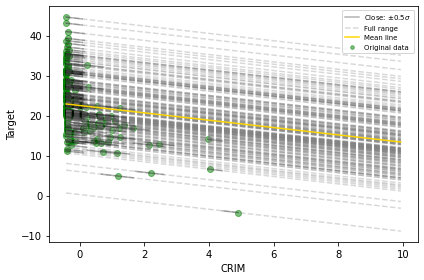

In [55]:
ice.ice_plot_single_feature('CRIM')